# 作業 : (Kaggle)房價預測

# [作業目標]
- 試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響

# [作業重點]
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [44]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import os
os.chdir(r'C:\Users\戴嘉萱\Documents\marching learning100day\all data')
df_train = pd.read_csv('house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [45]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
'''
num_features = []

for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')'''
num_features=df.select_dtypes(include=['float64','int64']).columns#原本設為a


In [46]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()
print(train_num,df.shape[0])


1460 1460


In [47]:
print(train_Y.shape[0])
print(df.shape[0])

1460
1460


# 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

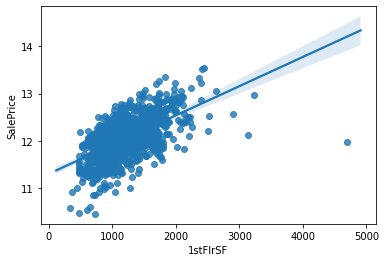

0.8466510874327978

In [48]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

In [40]:
print(df.shape[0])
print(train_Y.shape[0])

1460
1460


In [49]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
"""
Your Code Here
"""
train_X=df[df['1stFlrSF']<4000]
train_Y=train_Y[df['1stFlrSF']<4000]
print(train_X.shape[0])
print(train_Y.shape[0])

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(train_X)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

1459
1459


0.8814188058766472

# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

In [50]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
"""
Your Code Here
"""
def is_valid(feature, nstd):
    ub = feature.mean() + nstd * feature.std()#上界
    lb = feature.mean() - nstd * feature.std()#下界
    return (feature > lb) & (feature <ub)

valid = is_valid(df['1stFlrSF'], 3)
train_X=df[valid]
train_Y=train_Y[valid]
print(train_X.shape[0],train_Y.shape[0])

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(train_X)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

1448 1448


0.8904259418487527